# 환경설정

In [1]:
import pandas
import tensorflow

print(pandas.__version__)
print(tensorflow.__version__)

1.3.3
2.6.0


In [2]:
import datetime as dt
from pathlib import Path
import os

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_path = Path(os.getenv('HOME')+'/aiffel/yoochoose/data/') 
train_path = data_path / 'ratings.dat'

def load_data(data_path: Path, nrows=None):
    data = pd.read_csv(data_path, sep='::', header=None, usecols=[0, 1, 2, 3], dtype={0: np.int32, 1: np.int32, 2: np.int32}, nrows=nrows)
    data.columns = ['UserId', 'ItemId', 'Rating', 'Time']
    return data

data = load_data(train_path, None)
data['Time'] = pd.to_datetime(data['Time'], unit='s')
data.sort_values(['UserId', 'Time'], inplace=True)  # data를 id와 시간 순서로 정렬해줍니다.
data

,UserId,ItemId,Rating,Time
31,1,3186,4,2000-12-31 22:00:19
22,1,1270,5,2000-12-31 22:00:55
27,1,1721,4,2000-12-31 22:00:55
37,1,1022,5,2000-12-31 22:00:55
24,1,2340,3,2000-12-31 22:01:43
...,...,...,...,...
1000019,6040,2917,4,2001-08-10 14:40:29
999988,6040,1921,4,2001-08-10 14:41:04
1000172,6040,1784,3,2001-08-10 14:41:04
1000167,6040,161,3,2001-08-10 14:41:26


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 31 to 1000042
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   UserId  1000209 non-null  int32         
 1   ItemId  1000209 non-null  int32         
 2   Rating  1000209 non-null  int32         
 3   Time    1000209 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int32(3)
memory usage: 26.7 MB


~~Time 부분은 dataframe 형식이지만 데이터 타입 자체는 int로 되어있다. ~~<br>
~~이를 고려하여 최근 1달간의 데이터만 추출하도록 한다.~~

초장에 Time을 dataframe 형식으로 받아왔다.


# Step 1. 데이터의 전처리

In [5]:
data['UserId'].nunique(), data['ItemId'].nunique()

(6040, 3706)

총 6040명의 유저가 있고, 3706개의 아이템이 존재한다.

In [6]:
user_length = data.groupby('UserId').size()
user_length

UserId
1        53
2       129
3        51
4        21
5       198
       ... 
6036    888
6037    202
6038     20
6039    123
6040    341
Length: 6040, dtype: int64

user_length로 각 유저별로 대략 몇 개의 영화에 평점을 매겼는지 확인할 수 있다.

In [7]:
user_length.median(), user_length.mean()

(96.0, 165.5975165562914)

In [8]:
user_length.min(), user_length.max()

(20, 2314)

In [9]:
user_length.quantile(0.999)

1343.181000000005

일반적인 평점 매긴 영화 개수는 유저당 96~165개 정도 이다. <br>
99.9% 유저는 영화 1343개 이하의 영화 평점을 매긴것으로 보인다. 

생각보다 많은 영화 평점을 매기는 것으로 보이는데 1번 유저의 상황을 확인해보자.

In [10]:
long_user = user_length[user_length==53].index[0]
data[data['UserId']==long_user]

,UserId,ItemId,Rating,Time
31,1,3186,4,2000-12-31 22:00:19
22,1,1270,5,2000-12-31 22:00:55
27,1,1721,4,2000-12-31 22:00:55
37,1,1022,5,2000-12-31 22:00:55
24,1,2340,3,2000-12-31 22:01:43
36,1,1836,5,2000-12-31 22:02:52
3,1,3408,4,2000-12-31 22:04:35
7,1,2804,5,2000-12-31 22:11:59
47,1,1207,4,2000-12-31 22:11:59
0,1,1193,5,2000-12-31 22:12:40


정말로 51개의 영화에 평점을 매긴 것으로 보인다. <br>
특이한 점이 하나 보이는데 서로 다른 ItemID임에도 불구하고 동일한 시각에 따닥 평점을 매긴 경우가 많이 보인다. 

이번에는 가장 많은 평점을 매긴 유저의 상황을 보도록 하자

In [11]:
long_user = user_length[user_length==2314].index[0]
data[data['UserId']==long_user]

,UserId,ItemId,Rating,Time
696969,4169,1268,5,2000-08-03 20:09:52
697168,4169,2617,4,2000-08-03 20:09:52
697185,4169,2628,4,2000-08-03 20:09:52
697219,4169,2653,4,2000-08-03 20:09:52
697275,4169,423,3,2000-08-03 20:09:52
...,...,...,...,...
697882,4169,3754,2,2002-06-15 20:52:27
695702,4169,1413,3,2002-06-15 21:03:51
697358,4169,494,4,2002-06-15 21:16:00
695945,4169,1804,2,2002-06-15 21:16:23


이번에도 마찬가지로 동일 시각에 여러 작품을 평가한 흔적이 보인다.

동시에 여러작품을 어떻게 평가 한 것일까? 복수 선택 기능이라도 사용한 것일까?

하지만 그것은 사실 중요하지 않으므로 시간이 중복되더라도 삭제하지는 않는다.

유저 아이디를 세션별로 추천 시스템을 구축하는 것이기 때문이다.

In [12]:
length_count = user_length.groupby(user_length).size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_99 = length_percent_cumsum[length_percent_cumsum < 0.99]

length_percent_cumsum_99

20     0.014238
21     0.029305
22     0.042053
23     0.055464
24     0.068874
         ...   
888    0.989073
893    0.989404
894    0.989570
900    0.989735
903    0.989901
Length: 684, dtype: float64

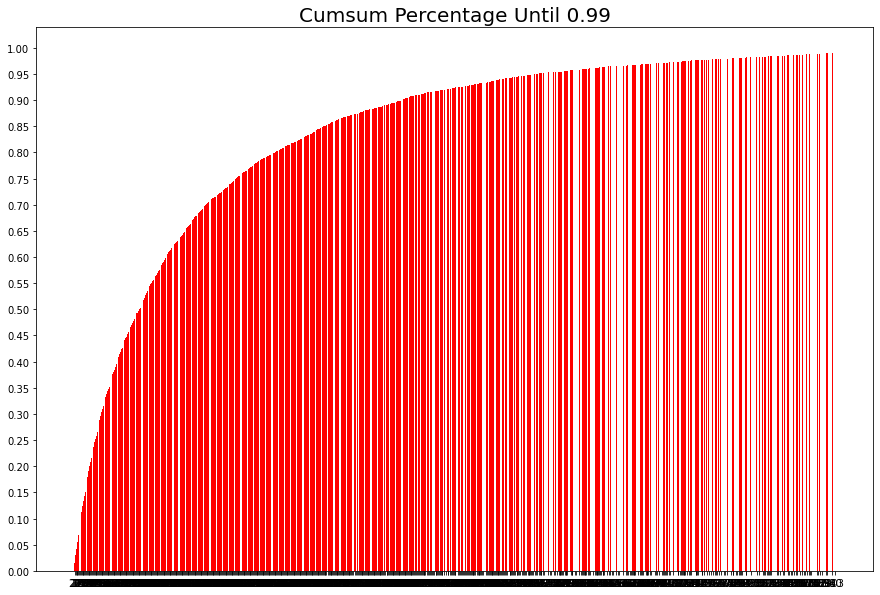

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.bar(x=length_percent_cumsum_99.index,
        height=length_percent_cumsum_99, color='red')
plt.xticks(length_percent_cumsum_99.index)
plt.yticks(np.arange(0, 1.01, 0.05))
plt.title('Cumsum Percentage Until 0.99', size=20)
plt.show()

세션 길이 기준 하위 99%의 길이는 903 이하인 것을 확인하였다. 

In [14]:
import datetime
_date = datetime.datetime.fromtimestamp(int(965333392)).strftime('%Y-%m-%d %H:%M:%S')
_date

'2000-08-03 20:09:52'

In [15]:
oldest, latest = data['Time'].min(), data['Time'].max()
print(oldest) 
print(latest)

2000-04-25 23:05:32
2003-02-28 17:49:50


2000년 4월 25일부터 2003년 2월 28일까지의 자료임을 확인하였다. 

userID 별로 추천 시스템을 구축하는 것이고, 각자의 취향을 쉽게 바뀌지 않으므로 모든 데이터를 그대로 활용하도록 한다.

In [19]:
type(latest)

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
# short_session을 제거한 다음 unpopular item을 제거하면 다시 길이가 1인 session이 생길 수 있습니다.
# 이를 위해 반복문을 통해 지속적으로 제거 합니다.
def cleanse_recursive(data: pd.DataFrame, shortest, least_rate) -> pd.DataFrame:
    while True:
        before_len = len(data)
        data = cleanse_short_session(data, shortest)
        data = cleanse_unpopular_item(data, least_rate)
        after_len = len(data)
        if before_len == after_len:
            break
    return data


def cleanse_short_session(data: pd.DataFrame, shortest):
    session_len = data.groupby('UserId').size()
    session_use = session_len[session_len >= shortest].index
    data = data[data['UserId'].isin(session_use)]
    return data


def cleanse_unpopular_item(data: pd.DataFrame, least_rate):
    item_popular = data.groupby('ItemId').size()
    item_use = item_popular[item_popular >= least_rate].index
    data = data[data['ItemId'].isin(item_use)]
    return data

앞서서 유저 평균은 95~160번 정도 시청하였고 최저 값은 20번이었다. <br> 
마찬가지로 영화는 몇번 보여졌는지 확인해보자

In [21]:
data.groupby('ItemId').size().mean()


269.88909875876953

In [22]:
data.groupby('ItemId').size().median()


123.5

대략 123~269번 정도다

In [23]:
data.groupby('ItemId').size().min()


1

In [24]:

length_count = data.groupby('ItemId').size()
length_percent_cumsum = length_count.cumsum() / length_count.sum()
length_percent_cumsum_99 = length_percent_cumsum[length_percent_cumsum < 0.01]

length_percent_cumsum_99

ItemId
1     0.002077
2     0.002777
3     0.003255
4     0.003425
5     0.003721
6     0.004661
7     0.005119
8     0.005187
9     0.005289
10    0.006177
11    0.007209
12    0.007369
13    0.007468
14    0.007621
15    0.007767
16    0.008449
17    0.009284
18    0.009441
19    0.009830
20    0.009990
dtype: float64

영화 시청 횟수의 하위 0.01%은 20번 미만이므로 20번 미만은 제외하도록 한다.

In [25]:
data = cleanse_recursive(data, shortest=20, least_rate=20)
data

,UserId,ItemId,Rating,Time
31,1,3186,4,2000-12-31 22:00:19
22,1,1270,5,2000-12-31 22:00:55
27,1,1721,4,2000-12-31 22:00:55
37,1,1022,5,2000-12-31 22:00:55
24,1,2340,3,2000-12-31 22:01:43
...,...,...,...,...
1000019,6040,2917,4,2001-08-10 14:40:29
999988,6040,1921,4,2001-08-10 14:41:04
1000172,6040,1784,3,2001-08-10 14:41:04
1000167,6040,161,3,2001-08-10 14:41:26


이제 데이터 셋을 구성해보자. 

학습 / 검증 / 테스트 셋은 8:1:1 비율로 구분한다. 
34개월간의 데이터를 기준으로 진행하는 것이기 때문에 <br>
27개월  : 4개월 : 1개월 이렇게 구분하는 것이 좋을 듯 싶다.  

In [37]:
def split_by_date(data: pd.DataFrame, n_days: int):
    final_time = data['Time'].max()
    session_last_time = data.groupby('UserId')['Time'].max()
    final_timestamp = final_time - dt.timedelta(n_days)
    #final_timestamp = time.mktime(final_timestamp.timetuple())
    session_in_train = session_last_time[session_last_time < final_timestamp].index
    session_in_test = session_last_time[session_last_time >= final_timestamp].index

    before_date = data[data['UserId'].isin(session_in_train)]
    after_date = data[data['UserId'].isin(session_in_test)]
    after_date = after_date[after_date['ItemId'].isin(before_date['ItemId'])]
    return before_date, after_date

In [38]:
tr, test = split_by_date(data, n_days=40)
tr, val = split_by_date(tr, n_days=120)

In [39]:
# data에 대한 정보를 살펴봅니다.
def stats_info(data: pd.DataFrame, status: str):
    print(f'* {status} Set Stats Info\n'
          f'\t Events: {len(data)}\n'
          f'\t Sessions: {data["UserId"].nunique()}\n'
          f'\t Items: {data["ItemId"].nunique()}\n'
          f'\t First Time : {data["Time"].min()}\n'
          f'\t Last Time : {data["Time"].max()}\n')

In [40]:
stats_info(tr, 'train')
stats_info(val, 'valid')
stats_info(test, 'test')

* train Set Stats Info
	 Events: 864023
	 Sessions: 5702
	 Items: 3043
	 First Time : 2000-04-25 23:05:32
	 Last Time : 2002-09-20 10:05:26

* valid Set Stats Info
	 Events: 71364
	 Sessions: 190
	 Items: 2970
	 First Time : 2000-04-27 16:38:08
	 Last Time : 2003-01-19 04:47:17

* test Set Stats Info
	 Events: 59767
	 Sessions: 130
	 Items: 2985
	 First Time : 2000-05-01 11:15:13
	 Last Time : 2003-02-28 17:49:50



얼추 잘 나누어졌다.

In [41]:
# train set에 없는 아이템이 val, test기간에 생길 수 있으므로 train data를 기준으로 인덱싱합니다.
id2idx = {item_id : index for index, item_id in enumerate(tr['ItemId'].unique())}

def indexing(df, id2idx):
    df['item_idx'] = df['ItemId'].map(lambda x: id2idx.get(x, -1) + 1)  # id2idx에 없는 아이템은 모르는 값(-1) 처리 해줍니다.
    return df

tr = indexing(tr, id2idx)
val = indexing(val, id2idx)
test = indexing(test, id2idx)

In [42]:
save_path = data_path / 'processed'
save_path.mkdir(parents=True, exist_ok=True)

tr.to_pickle(save_path / 'train.pkl')
val.to_pickle(save_path / 'valid.pkl')
test.to_pickle(save_path / 'test.pkl')

이걸로 데이터 저장을 모두 마쳤다.

# Step 2. 미니 배치의 구성


 Session-Parallel Mini-Batch 를 구현해 봅니다.



In [43]:
class SessionDataset:

    def __init__(self, data):
        self.df = data
        self.click_offsets = self.get_click_offsets()
        self.session_idx = np.arange(self.df['UserId'].nunique())  # indexing to SessionId

    def get_click_offsets(self):
        """
        Return the indexes of the first click of each session IDs,
        """
        offsets = np.zeros(self.df['UserId'].nunique()+1, dtype=np.int32)
        offsets[1:] = self.df.groupby('UserId').size().cumsum()
        return offsets

train데이터로 SessionDataset 객체를 만들고 인스턴스 변수들을 살펴보겠습니다. <br>
click_offsets 변수는 각 세션이 시작된 인덱스를 담고 있습니다.<br>
session_idx 변수는 각 세션을 인덱싱한 np.array 입니다.

In [44]:
tr_dataset = SessionDataset(tr)
tr_dataset.df.head(10)

,UserId,ItemId,Rating,Time,item_idx
31,1,3186,4,2000-12-31 22:00:19,1
22,1,1270,5,2000-12-31 22:00:55,2
27,1,1721,4,2000-12-31 22:00:55,3
37,1,1022,5,2000-12-31 22:00:55,4
24,1,2340,3,2000-12-31 22:01:43,5
36,1,1836,5,2000-12-31 22:02:52,6
3,1,3408,4,2000-12-31 22:04:35,7
7,1,2804,5,2000-12-31 22:11:59,8
47,1,1207,4,2000-12-31 22:11:59,9
0,1,1193,5,2000-12-31 22:12:40,10


In [45]:
tr_dataset.click_offsets

array([     0,     53,    182, ..., 863562, 863685, 864023], dtype=int32)

In [46]:
tr_dataset.session_idx

array([   0,    1,    2, ..., 5699, 5700, 5701])

In [47]:
class SessionDataLoader:
    """Credit to yhs-968/pyGRU4REC."""

    def __init__(self, dataset: SessionDataset, batch_size=50):
        self.dataset = dataset
        self.batch_size = batch_size

    def __iter__(self):
        """ Returns the iterator for producing session-parallel training mini-batches.
        Yields:
            input (B,):  Item indices that will be encoded as one-hot vectors later.
            target (B,): a Variable that stores the target item indices
            masks: Numpy array indicating the positions of the sessions to be terminated
        """

        start, end, mask, last_session, finished = self.initialize()  # initialize 메소드에서 확인해주세요.
        """
        start : Index Where Session Start
        end : Index Where Session End
        mask : indicator for the sessions to be terminated
        """

        while not finished:
            min_len = (end - start).min() - 1  # Shortest Length Among Sessions
            for i in range(min_len):
                # Build inputs & targets
                inp = self.dataset.df['item_idx'].values[start + i]
                target = self.dataset.df['item_idx'].values[start + i + 1]
                yield inp, target, mask

            start, end, mask, last_session, finished = self.update_status(start, end, min_len, last_session, finished)

    def initialize(self):
        first_iters = np.arange(self.batch_size)    # 첫 배치에 사용할 세션 Index를 가져옵니다.
        last_session = self.batch_size - 1    # 마지막으로 다루고 있는 세션 Index를 저장해둡니다.
        #print(first_iters)
        start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data 상에서 session이 시작된 위치를 가져옵니다.
        end = self.dataset.click_offsets[self.dataset.session_idx[first_iters + 1]]  # session이 끝난 위치 바로 다음 위치를 가져옵니다.
        mask = np.array([])   # session의 모든 아이템을 다 돌은 경우 mask에 추가해줄 것입니다.
        finished = False         # data를 전부 돌았는지 기록하기 위한 변수입니다.
        return start, end, mask, last_session, finished

    def update_status(self, start: np.ndarray, end: np.ndarray, min_len: int, last_session: int, finished: bool):  
        # 다음 배치 데이터를 생성하기 위해 상태를 update합니다.
        
        start += min_len   # __iter__에서 min_len 만큼 for문을 돌았으므로 start를 min_len 만큼 더해줍니다.
        mask = np.arange(self.batch_size)[(end - start) == 1]  
        # end는 다음 세션이 시작되는 위치인데 start와 한 칸 차이난다는 것은 session이 끝났다는 뜻입니다. mask에 기록해줍니다.

        for i, idx in enumerate(mask, start=1):  # mask에 추가된 세션 개수만큼 새로운 세션을 돌것입니다.
            new_session = last_session + i  
            if new_session > self.dataset.session_idx[-1]:  # 만약 새로운 세션이 마지막 세션 index보다 크다면 모든 학습데이터를 돈 것입니다.
                finished = True
                break
            # update the next starting/ending point
            start[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session]]     # 종료된 세션 대신 새로운 세션의 시작점을 기록합니다.
            end[idx] = self.dataset.click_offsets[self.dataset.session_idx[new_session] + 1]

        last_session += len(mask)  # 마지막 세션의 위치를 기록해둡니다.
        return start, end, mask, last_session, finished

In [48]:
tr_data_loader = SessionDataLoader(tr_dataset, batch_size=4)
tr_dataset.df.head(15)

,UserId,ItemId,Rating,Time,item_idx
31,1,3186,4,2000-12-31 22:00:19,1
22,1,1270,5,2000-12-31 22:00:55,2
27,1,1721,4,2000-12-31 22:00:55,3
37,1,1022,5,2000-12-31 22:00:55,4
24,1,2340,3,2000-12-31 22:01:43,5
36,1,1836,5,2000-12-31 22:02:52,6
3,1,3408,4,2000-12-31 22:04:35,7
7,1,2804,5,2000-12-31 22:11:59,8
47,1,1207,4,2000-12-31 22:11:59,9
0,1,1193,5,2000-12-31 22:12:40,10


In [50]:
iter_ex = iter(tr_data_loader)

In [51]:
inputs, labels, mask =  next(iter_ex)
print(f'Model Input Item Idx are : {inputs}')
print(f'Label Item Idx are : {"":5} {labels}')
print(f'Previous Masked Input Idx are {mask}')

Model Input Item Idx are : [ 1 54 66 55]
Label Item Idx are :       [ 2 55 63 25]
Previous Masked Input Idx are []


이것으로 미니배치 구성을 마친다.

# Step 3. 모델 구성


In [52]:
def mrr_k(pred, truth: int, k: int):
    indexing = np.where(pred[:k] == truth)[0]
    if len(indexing) > 0:
        return 1 / (indexing[0] + 1)
    else:
        return 0


def recall_k(pred, truth: int, k: int) -> int:
    answer = truth in pred[:k]
    return int(answer)

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout, GRU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm

In [54]:
def create_model(args):
    inputs = Input(batch_shape=(args.batch_size, 1, args.num_items))
    gru, _ = GRU(args.hsz, stateful=True, return_state=True, name='GRU')(inputs)
    dropout = Dropout(args.drop_rate)(gru)
    predictions = Dense(args.num_items, activation='softmax')(dropout)
    model = Model(inputs=inputs, outputs=[predictions])
    model.compile(loss=categorical_crossentropy, optimizer=Adam(args.lr), metrics=['accuracy'])
    model.summary()
    return model

In [55]:
class Args:
    def __init__(self, tr, val, test, batch_size, hsz, drop_rate, lr, epochs, k):
        self.tr = tr
        self.val = val
        self.test = test
        self.num_items = tr['ItemId'].nunique()
        self.num_sessions = tr['UserId'].nunique()
        self.batch_size = batch_size
        self.hsz = hsz
        self.drop_rate = drop_rate
        self.lr = lr
        self.epochs = epochs
        self.k = k

args = Args(tr, val, test, batch_size=100, hsz=50, drop_rate=0.1, lr=0.001, epochs=5, k=20)

In [56]:
val.sort_values(['item_idx', 'Time'], inplace=True)

In [57]:
val

,UserId,ItemId,Rating,Time,item_idx
986671,5956,3186,4,2000-04-30 07:35:49,1
886938,5359,3186,4,2000-06-25 04:10:57,1
823331,4950,3186,2,2000-07-07 04:26:24,1
798002,4785,3186,4,2000-07-07 20:36:22,1
777864,4647,3186,3,2000-07-19 00:14:59,1
...,...,...,...,...,...
193542,1194,3442,3,2002-11-03 07:35:56,3041
943304,5689,219,4,2000-05-26 18:10:11,3042
456387,2810,219,5,2000-10-29 03:51:20,3042
684081,4089,3313,2,2000-08-06 04:50:14,3043


In [58]:
type(args.num_items)

int

In [59]:
model = create_model(args)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(100, 1, 3043)]          0         
_________________________________________________________________
GRU (GRU)                    [(100, 50), (100, 50)]    464250    
_________________________________________________________________
dropout (Dropout)            (100, 50)                 0         
_________________________________________________________________
dense (Dense)                (100, 3043)               155193    
Total params: 619,443
Trainable params: 619,443
Non-trainable params: 0
_________________________________________________________________


이것으로 모델 구성을 마친다.

# Step 4. 모델 학습


In [60]:
# train 셋으로 학습하면서 valid 셋으로 검증합니다.
def train_model(model, args):
    train_dataset = SessionDataset(args.tr)
    train_loader = SessionDataLoader(train_dataset, batch_size=args.batch_size)

    for epoch in range(1, args.epochs + 1):
        total_step = len(args.tr) - args.tr['UserId'].nunique()
        tr_loader = tqdm(train_loader, total=total_step // args.batch_size, desc='Train', mininterval=1)
        for feat, target, mask in tr_loader:
            reset_hidden_states(model, mask)  # 종료된 session은 hidden_state를 초기화합니다. 아래 메서드에서 확인해주세요.

            feat = feat - 1
            target = target -1 # index bound Error 방지
            input_ohe = to_categorical(feat, num_classes=args.num_items )
            input_ohe = np.expand_dims(input_ohe, axis=1)
            target_ohe = to_categorical(target, num_classes=args.num_items)

            result = model.train_on_batch(input_ohe, target_ohe)
            tr_loader.set_postfix(train_loss=result[0], accuracy = result[1])

        val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  # valid set에 대해 검증합니다.

        print(f"\t - Recall@{args.k} epoch {epoch}: {val_recall:3f}")
        print(f"\t - MRR@{args.k}    epoch {epoch}: {val_mrr:3f}\n")


def reset_hidden_states(model, mask):
    gru_layer = model.get_layer(name='GRU')  # model에서 gru layer를 가져옵니다.
    hidden_states = gru_layer.states[0].numpy()  # gru_layer의 parameter를 가져옵니다.
    for elt in mask:  # mask된 인덱스 즉, 종료된 세션의 인덱스를 돌면서
        hidden_states[elt, :] = 0  # parameter를 초기화 합니다.
    gru_layer.reset_states(states=hidden_states)


def get_metrics(data, model, args, k: int):  # valid셋과 test셋을 평가하는 코드입니다. 
                                             # train과 거의 같지만 mrr, recall을 구하는 라인이 있습니다.
    dataset = SessionDataset(data)
    loader = SessionDataLoader(dataset, batch_size=args.batch_size)
    recall_list, mrr_list = [], []

    total_step = len(data) - data['UserId'].nunique()
    val_loader = tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1)
    for inputs, label, mask in val_loader :
        reset_hidden_states(model, mask)
        
        input_ohe = to_categorical(inputs, num_classes=args.num_items)
        input_ohe = np.expand_dims(input_ohe, axis=1)

        pred = model.predict(input_ohe, batch_size=args.batch_size)
        pred_arg = tf.argsort(pred, direction='DESCENDING')  # softmax 값이 큰 순서대로 sorting 합니다.

        length = len(inputs)
        recall_list.extend([recall_k(pred_arg[i], label[i], k) for i in range(length)])
        mrr_list.extend([mrr_k(pred_arg[i], label[i], k) for i in range(length)])

    recall, mrr = np.mean(recall_list), np.mean(mrr_list)
    return recall, mrr

### 첫 모델 학습

In [61]:
train_model(model, args)

Evaluation:  60%|█████▉    | 424/711 [03:12<02:10,  2.20it/s]


	 - Recall@20 epoch 1: 0.427382
	 - MRR@20    epoch 1: 0.109988



Evaluation:  60%|█████▉    | 424/711 [02:51<01:56,  2.47it/s]


	 - Recall@20 epoch 2: 0.579222
	 - MRR@20    epoch 2: 0.162596



Evaluation:  60%|█████▉    | 424/711 [02:53<01:57,  2.45it/s]


	 - Recall@20 epoch 3: 0.603632
	 - MRR@20    epoch 3: 0.157721



Evaluation:  60%|█████▉    | 424/711 [02:58<02:00,  2.38it/s]


	 - Recall@20 epoch 4: 0.600920
	 - MRR@20    epoch 4: 0.145319



Evaluation:  60%|█████▉    | 424/711 [02:59<02:01,  2.36it/s]

	 - Recall@20 epoch 5: 0.585142
	 - MRR@20    epoch 5: 0.129164



재현률은 58%정도이나 정확도가 너무 낮다.
<br>
파라미터를 조정하여 모델 학습을 진행한다. 

### 2번째 모델 학습

In [65]:
args = Args(tr, val, test, batch_size=80, hsz=50, drop_rate=0.1, lr=0.001, epochs=5, k=20)
model = create_model(args)
train_model(model, args)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(80, 1, 3043)]           0         
_________________________________________________________________
GRU (GRU)                    [(80, 50), (80, 50)]      464250    
_________________________________________________________________
dropout_1 (Dropout)          (80, 50)                  0         
_________________________________________________________________
dense_1 (Dense)              (80, 3043)                155193    
Total params: 619,443
Trainable params: 619,443
Non-trainable params: 0
_________________________________________________________________


Evaluation:  70%|███████   | 624/889 [03:53<01:39,  2.67it/s]


	 - Recall@20 epoch 1: 0.437861
	 - MRR@20    epoch 1: 0.117372



Evaluation:  70%|███████   | 624/889 [03:29<01:29,  2.97it/s]


	 - Recall@20 epoch 2: 0.588602
	 - MRR@20    epoch 2: 0.158533



Evaluation:  70%|███████   | 624/889 [03:29<01:28,  2.98it/s]


	 - Recall@20 epoch 3: 0.620192
	 - MRR@20    epoch 3: 0.153528



Evaluation:  70%|███████   | 624/889 [03:32<01:30,  2.94it/s]


	 - Recall@20 epoch 4: 0.613281
	 - MRR@20    epoch 4: 0.139942



Evaluation:  70%|███████   | 624/889 [03:40<01:33,  2.83it/s]

	 - Recall@20 epoch 5: 0.581330
	 - MRR@20    epoch 5: 0.120275



별 차이가 없는 것 같다.

### 3번째 모델

In [67]:
args = Args(tr, val, test, batch_size=150, hsz=50, drop_rate=0.1, lr=0.001, epochs=5, k=20)
model = create_model(args)
train_model(model, args)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(150, 1, 3043)]          0         
_________________________________________________________________
GRU (GRU)                    [(150, 50), (150, 50)]    464250    
_________________________________________________________________
dropout_2 (Dropout)          (150, 50)                 0         
_________________________________________________________________
dense_2 (Dense)              (150, 3043)               155193    
Total params: 619,443
Trainable params: 619,443
Non-trainable params: 0
_________________________________________________________________


Evaluation:  33%|███▎      | 156/474 [01:51<03:46,  1.40it/s]


	 - Recall@20 epoch 1: 0.343077
	 - MRR@20    epoch 1: 0.078009



Evaluation:  33%|███▎      | 156/474 [01:37<03:19,  1.60it/s]


	 - Recall@20 epoch 2: 0.524359
	 - MRR@20    epoch 2: 0.131847



Evaluation:  33%|███▎      | 156/474 [01:34<03:12,  1.66it/s]


	 - Recall@20 epoch 3: 0.596154
	 - MRR@20    epoch 3: 0.142204



Evaluation:  33%|███▎      | 156/474 [01:35<03:13,  1.64it/s]


	 - Recall@20 epoch 4: 0.597564
	 - MRR@20    epoch 4: 0.131748



Evaluation:  33%|███▎      | 156/474 [01:36<03:16,  1.62it/s]

	 - Recall@20 epoch 5: 0.579573
	 - MRR@20    epoch 5: 0.120100



# Step 5. 모델 테스트


In [62]:
def test_model(model, args, test):
    test_recall, test_mrr = get_metrics(test, model, args, 20)
    print(f"\t - Recall@{args.k}: {test_recall:3f}")
    print(f"\t - MRR@{args.k}: {test_mrr:3f}\n")

#### 첫 번째 시도

In [63]:
test_model(model, args, test)

Evaluation:  37%|███▋      | 222/596 [02:04<03:29,  1.79it/s]

	 - Recall@20: 0.032883
	 - MRR@20: 0.006219



재현율이 상당히 낮게 나왔다. 학습이 제대로 되지 않았다는 것이다. 

#### 2번째 시도

In [66]:
test_model(model, args, test)

Evaluation:  51%|█████     | 381/745 [02:57<02:49,  2.15it/s]

	 - Recall@20: 0.032480
	 - MRR@20: 0.005733



#### 3번째 시도

In [69]:
test_model(model, args, test)

Evaluation:   0%|          | 0/397 [00:00<?, ?it/s]


IndexError: index 130 is out of bounds for axis 0 with size 130

모두 성능이 낮게 나온다.

# 마무리

정확도가 높은 모델을 학습하지 못하였다. <br>
데이터 전처리가 제대로 이루어지지 않았기 때문이다. 이는 내가 추천 시스템을 정확히 파악하지 못한 탓이 크다.

실습을 진행하면서 여러 버그가 나왔는데 이는 아래와 같다.


#### out of bound Error

---------------------------------------------------------------------------
IndexError                                Traceback (most recent call last)
/tmp/ipykernel_12098/3078826308.py in <module>
----> 1 val_recall, val_mrr = get_metrics(args.val, model, args, args.k)  # valid set에 대해 검증합니다.
/tmp/ipykernel_12098/872833715.py in get_metrics(data, model, args, k)

42     val_loader = tqdm(loader, total=total_step // args.batch_size, desc='Evaluation', mininterval=1)

43     print(1)

---> 44     for inputs1, label, mask in val_loader :

45         print(2)

46         reset_hidden_states(model, mask)


/opt/conda/lib/python3.9/site-packages/tqdm/std.py in iter(self)

1178

1179         try:

-> 1180             for obj in iterable:

1181                 yield obj

1182                 # Update and possibly print the progressbar.


/tmp/ipykernel_12098/627479726.py in iter(self)

14         """

15

---> 16         start, end, mask, last_session, finished = self.initialize()  # initialize 메소드에서 확인해주세요.

17         """

18         start : Index Where Session Start


/tmp/ipykernel_12098/627479726.py in initialize(self)

34         first_iters = np.arange(self.batch_size)    # 첫 배치에 사용할 세션 Index를 가져옵니다.

35         last_session = self.batch_size - 1    # 마지막으로 다루고 있는 세션 Index를 저장해둡니다.

---> 36         start = self.dataset.click_offsets[self.dataset.session_idx[first_iters]]       # data 상에서 session이 시작된 위치를 가져옵니다.

37         end = self.dataset.click_offsets[self.dataset.session_idx[first_iters] + 1]  # session이 끝난 위치 바로 다음 위치를 가져옵니다.

38         mask = np.array([])   # session의 모든 아이템을 다 돌은 경우 mask에 추가해줄 것입니다.


IndexError: index 212 is out of bounds for axis 0 with size 212
    
    ---------------------------------

위와 같은 에러가 나왔는데, batch_size가 index 범주를 넘어버릴 경우 발생하는 것으로 판단되었다. batch_siez를 256에서 100으로 줄였더니 해결되었다.

#### int형 자료 타임스탬프 확인

In [16]:
datetime.datetime.fromtimestamp(int(oldest)).strftime('%Y-%m-%d %H:%M:%S')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Timestamp'

In [18]:
datetime.datetime.fromtimestamp(int(latest)).strftime('%Y-%m-%d %H:%M:%S')

TypeError: int() argument must be a string, a bytes-like object or a number, not 'Timestamp'

위 코드로 19827398 이런 식으로 타임스탬프 형태의 자료지만 type이 int형이었을때 이를 datetime형으로 바꿔 출력할 수 있는 코드이다.

이를 바탕으로 아래와 같이 전처리를 진행했었다.

In [81]:
month_ago = datetime.datetime.fromtimestamp(latest) - dt.timedelta(30)# 최종 날짜로부터 30일 이전 날짜를 구한다.  

In [82]:
import time

In [83]:
timestamp = time.mktime(month_ago.timetuple())

In [84]:
timestamp

1043862590.0

In [55]:
#month_ago = datetime.datetime.fromtimestamp(latest) - dt.timedelta(30)     
data = data[data['Time'] > timestamp]   # 방금 구한 날짜 이후의 데이터만 모은다. 
data

,UserId,ItemId,Rating,Time
28225,195,2808,3,1044220118
27759,195,1254,4,1044552222
27921,195,1456,2,1044662852
28443,195,468,3,1044985356
28255,195,2748,1,1044987808
...,...,...,...,...
984731,5950,3948,4,1046369637
984682,5950,3578,4,1046369670
984475,5950,3793,3,1046369710
984660,5950,3555,2,1046369737
